In [3]:
import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cmocean
import PlotFunctions.PlotUtils as PlotUtils

from matplotlib import rcParams
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 24})


rootFolder = 'C:/Users/Deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis/VelocityTimeSeries'

dataset1 = 'Polychate_Night__VelocityTimeSeries.csv'
dataset2 = 'Polychaete_Day__VelocityTimeSeries.csv'

df1 = pd.read_csv(os.path.join(rootFolder, dataset1))


df2 = pd.read_csv(os.path.join(rootFolder, dataset2))

dataFrame = df1.append(df2)

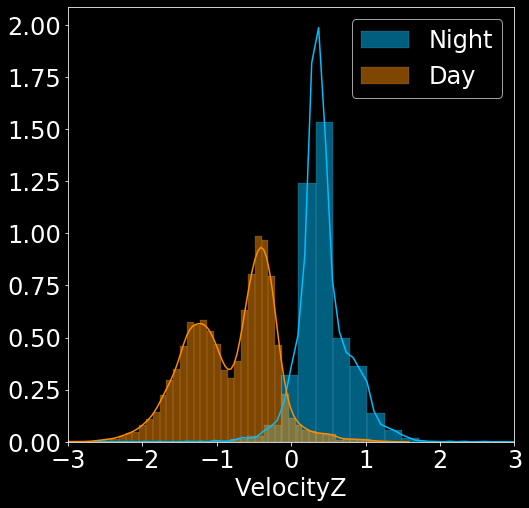

In [4]:
# Make plots of the vertical velocity distribution
from matplotlib.lines import Line2D

plt.style.use("dark_background")
custom_line = [Line2D([0], [0], color='gold', lw=4, alpha = 0.5), Line2D([0], [0], color='k', lw=4, alpha = 0.5) ]

my_pal = {'Day': 'darkorange' ,'Night': 'deepskyblue'}
plt.figure(figsize = (8,8))

# Day
#ax2 = sns.distplot(dataFrame["VelocityX_noWall"],  kde = True , color = 'r', norm_hist = True, hist_kws={"histtype": "bar","edgecolor":'w', "linewidth": 0.2, "alpha": 0.5})

ax3 = sns.distplot(dataFrame.loc[dataFrame["Condition"] == 'Night',"VelocityZ"],  kde = True , color = 'deepskyblue', norm_hist = True, hist_kws={"histtype": "bar","edgecolor":'w', "linewidth": 0.2, "alpha": 0.5, "label":'Night'})
ax4 = sns.distplot(dataFrame.loc[dataFrame["Condition"] == 'Day',"VelocityZ"],  kde = True , color = 'darkorange', norm_hist = True, hist_kws={"histtype": "bar","edgecolor":'w', "linewidth": 0.2, "alpha": 0.5, "label":'Day'})
#plt.legend((ax3, ax4))
plt.legend()
plt.xlim(-3,3)

plt.savefig('Polychaete_Diel_behavior_darkbackground.svg')
plt.show()

# Box plot

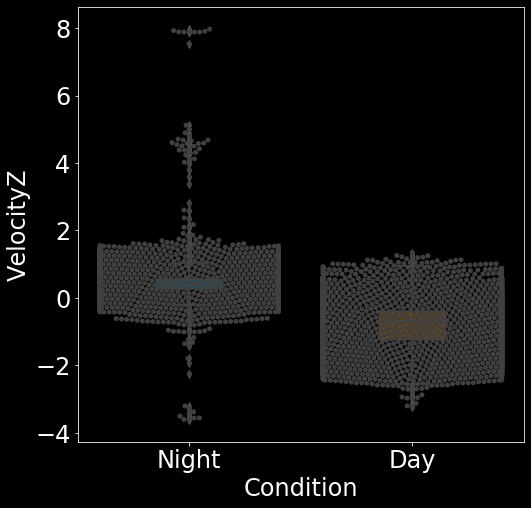

In [5]:
plt.figure(figsize=(8,8))

ax = sns.boxplot(x = "Condition", y = "VelocityZ",data = dataFrame, width = 0.3, palette= my_pal,boxprops=dict(alpha=0.5))
ax1 = sns.swarmplot(x = "Condition", y = "VelocityZ",data = dataFrame, color=".25")
plt.show()

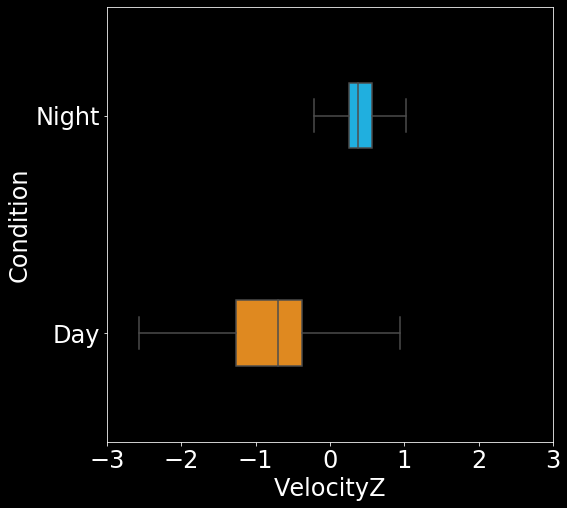

In [13]:
plt.figure(figsize=(8,8))

ax = sns.boxplot(y = "Condition", x = "VelocityZ",data = dataFrame, width = 0.3, showfliers=False, palette= my_pal,boxprops=dict(alpha=1.0))

plt.xlim(-3,3)
plt.savefig('Polychaete_Diel_Migration_BoxPlot.svg')
plt.show()